In [50]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os.path

from functions import Polynomial_Features
from runge_function import Runge_func
from OLS import OLS
from Ridge import Ridge
from LASSO import LASSO
from plotting import set_plot_params

### OLS Gradient Descent

In [21]:
"""
Generates and saves the MSE for each number of iterations in range(min_its, max_its, step_size) for
each gradient descent method in the list gds. Outputs to the result to file.
"""

SAVE_NAME = "../output/gd_mse_vs_its_OLS.out"

np.random.seed(2025)

n=1000
deg = 10

min_its = 10
max_its = 10000
step_size = 100


learning_rate = 0.001

x = np.linspace(-1,1, n)

y_true = Runge_func(x)
y_noisy = y_true + np.random.normal(0,0.1, n)


X_unscaled = Polynomial_Features(x, deg)

X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_noisy, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_mean = y_train.mean()

# only non-stochastic versions
gds = [
        "simple",
        "momentum",
        "adagrad",
        "RMSProp",
        "adam",
]

its = np.array(range(0,max_its+1, step_size))
its[0]=10

output = np.zeros((len(its), len(gds)+1), dtype = float)
output[:,0] = its

for i_gd, gd in enumerate(gds):
    #check if file exists
    # if it does not compute its contents
    errors = np.zeros_like(its, dtype=float)
    # perform 1 run per num_it in its
    for i_its, num_it in enumerate(its):
        model = OLS(gd)
        # set precision = 0 so that GD never converges and stops at max_iter.
        thetas, its_done, _ = model.fit(X_train_scaled, y_train, momentum = 0.3, learning_rate = learning_rate ,max_iter = num_it, precision=0)
        if its_done != num_it:
            print(f"its {num_it} not matching")
        errors[i_its] = mean_squared_error(y_test, X_test_scaled @ thetas + y_mean)

    output[:,i_gd+1] = errors

header_string = "OLS gds, col0 its"
for i, gd in enumerate(gds):
    header_string = header_string + f", col{i} {gd} MSE"

np.savetxt(SAVE_NAME, output, header = header_string)

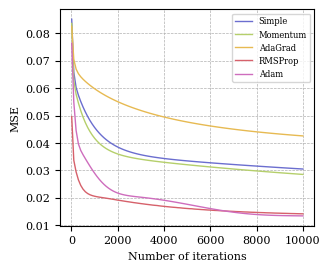

In [22]:
FOLDER = "../figs/"
SAVE_NAME = "gd_mse_against_its_OLS"
FILE_NAME = "../output/gd_mse_vs_its_OLS.out"

set_plot_params(1,1)
colors = mpl.color_sequences["tab20b"]

gds = [
        "simple",
        "momentum",
        "adagrad",
        "RMSProp",
        "adam",
]

capitalized_labels = [
    "Simple",
    "Momentum",
    "AdaGrad",
    "RMSProp",
    "Adam",
]

data = np.loadtxt(FILE_NAME, unpack=True)
its = data[0]
# plot gd from saved data
for i, gd in enumerate(gds):
    plt.plot(its, data[i+1], label = capitalized_labels[i], color = colors[4*i+2])

plt.ylabel("MSE")
plt.xlabel("Number of iterations")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(FOLDER + SAVE_NAME + ".pdf")
plt.show()

### OLS Stochastic Gradient Descent

In [17]:
"""
Generates and saves the MSE for each number of iterations in range(min_its, max_its, step_size) for
each gradient descent method in the list gds. Outputs to the result to file.
"""

SAVE_NAME = "../output/sgd_mse_vs_its_OLS.out"

np.random.seed(2025)

n=1000
deg = 10

min_its = 10
max_its = 10000
step_size = 100


learning_rate = 0.001

x = np.linspace(-1,1, n)

y_true = Runge_func(x)
y_noisy = y_true + np.random.normal(0,0.1, n)


X_unscaled = Polynomial_Features(x, deg)

X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_noisy, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_mean = y_train.mean()

# only stochastic versions
gds = [
        "simple_stochastic",
        "momentum_stochastic",
        "adagrad_stochastic",
        "RMSProp_stochastic",
        "adam_stochastic",
]

its = np.array(range(0,max_its+1, step_size))
its[0]=10

output = np.zeros((len(its), len(gds)+1), dtype = float)
output[:,0] = its

for i_gd, gd in enumerate(gds):
    #check if file exists
    # if it does not compute its contents
    errors = np.zeros_like(its, dtype=float)
    # perform 1 run per num_it in its
    for i_its, num_it in enumerate(its):
        model = OLS(gd)
        # set precision = 0 so that GD never converges and stops at max_iter.
        thetas, its_done, _ = model.fit(X_train_scaled, y_train, momentum = 0.3, learning_rate = learning_rate ,max_iter = num_it, precision=0)
        if its_done != num_it:
            print(f"its {num_it} not matching")
        errors[i_its] = mean_squared_error(y_test, X_test_scaled @ thetas + y_mean)

    output[:,i_gd+1] = errors

header_string = "OLS sgds, col0 its"
for i, gd in enumerate(gds):
    header_string = header_string + f", col{i} {gd} MSE"

np.savetxt(SAVE_NAME, output, header = header_string)

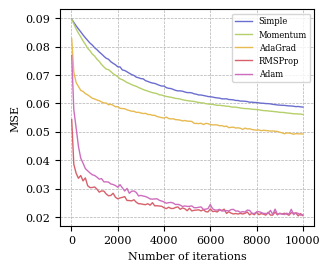

In [18]:
FOLDER = "../figs/"
SAVE_NAME = "sgd_mse_against_its_OLS"
FILE_NAME = "../output/sgd_mse_vs_its_OLS.out"

set_plot_params(1,1)
colors = mpl.color_sequences["tab20b"]

gds = [
        "simple_stochastic",
        "momentum_stochastic",
        "adagrad_stochastic",
        "RMSProp_stochastic",
        "adam_stochastic",
]

capitalized_labels = [
    "Simple",
    "Momentum",
    "AdaGrad",
    "RMSProp",
    "Adam",
]

data = np.loadtxt(FILE_NAME, unpack=True)
its = data[0]
# plot gd from saved data
for i, gd in enumerate(gds):
    plt.plot(its, data[i+1], label = capitalized_labels[i], color = colors[4*i+2])

plt.ylabel("MSE")
plt.xlabel("Number of iterations")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(FOLDER + SAVE_NAME + ".pdf")
plt.show()

### Ridge Gradient Descent

In [13]:
"""
Generates and saves the MSE for each number of iterations in range(min_its, max_its, step_size) for
each gradient descent method in the list gds. Outputs to the result to file.
"""

SAVE_NAME = "../output/gd_mse_vs_its_Ridge.out"

np.random.seed(2025)

n=1000
deg = 10

min_its = 10
max_its = 10000
step_size = 100


learning_rate = 0.001

x = np.linspace(-1,1, n)

y_true = Runge_func(x)
y_noisy = y_true + np.random.normal(0,0.1, n)


X_unscaled = Polynomial_Features(x, deg)

X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_noisy, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_mean = y_train.mean()

# only non-stochastic versions
gds = [
        "simple",
        "momentum",
        "adagrad",
        "RMSProp",
        "adam",
]

its = np.array(range(0,max_its+1, step_size))
its[0]=10

output = np.zeros((len(its), len(gds)+1), dtype = float)
output[:,0] = its

for i_gd, gd in enumerate(gds):
    #check if file exists
    # if it does not compute its contents
    errors = np.zeros_like(its, dtype=float)
    # perform 1 run per num_it in its
    for i_its, num_it in enumerate(its):
        model = Ridge(gd, llambda = 0.01)
        # set precision = 0 so that GD never converges and stops at max_iter.
        thetas, its_done, _ = model.fit(X_train_scaled, y_train, momentum = 0.3, learning_rate = learning_rate ,max_iter = num_it, precision=0)
        if its_done != num_it:
            print(f"its {num_it} not matching")
        errors[i_its] = mean_squared_error(y_test, X_test_scaled @ thetas + y_mean)

    output[:,i_gd+1] = errors

header_string = "Ridge gds, col0 its"
for i, gd in enumerate(gds):
    header_string = header_string + f", col{i} {gd} MSE"

np.savetxt(SAVE_NAME, output, header = header_string)

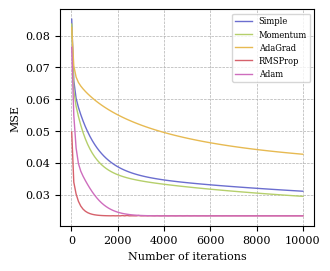

In [14]:
FOLDER = "../figs/"
SAVE_NAME = "gd_mse_against_its_Ridge"
FILE_NAME = "../output/gd_mse_vs_its_Ridge.out"

set_plot_params(1,1)
colors = mpl.color_sequences["tab20b"]

gds = [
        "simple",
        "momentum",
        "adagrad",
        "RMSProp",
        "adam",
]

capitalized_labels = [
    "Simple",
    "Momentum",
    "AdaGrad",
    "RMSProp",
    "Adam",
]

data = np.loadtxt(FILE_NAME, unpack=True)
its = data[0]
# plot gd from saved data
for i, gd in enumerate(gds):
    plt.plot(its, data[i+1], label = capitalized_labels[i], color = colors[4*i+2])

plt.ylabel("MSE")
plt.xlabel("Number of iterations")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(FOLDER + SAVE_NAME + ".pdf")
plt.show()

### Ridge Stochastic Gradient Descent

In [ ]:
"""
Generates and saves the MSE for each number of iterations in range(min_its, max_its, step_size) for
each gradient descent method in the list gds. Outputs to the result to file.
"""

SAVE_NAME = "../output/sgd_mse_vs_its_Ridge.out"

np.random.seed(2025)

n=1000
deg = 10

min_its = 10
max_its = 10000
step_size = 100


learning_rate = 0.001

x = np.linspace(-1,1, n)

y_true = Runge_func(x)
y_noisy = y_true + np.random.normal(0,0.1, n)


X_unscaled = Polynomial_Features(x, deg)

X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_noisy, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_mean = y_train.mean()

# only stochastic versions
gds = [
        "simple_stochastic",
        "momentum_stochastic",
        "adagrad_stochastic",
        "RMSProp_stochastic",
        "adam_stochastic",
]

its = np.array(range(0,max_its+1, step_size))
its[0]=10

output = np.zeros((len(its), len(gds)+1), dtype = float)
output[:,0] = its

for i_gd, gd in enumerate(gds):
    #check if file exists
    # if it does not compute its contents
    errors = np.zeros_like(its, dtype=float)
    # perform 1 run per num_it in its
    for i_its, num_it in enumerate(its):
        model = Ridge(gd, llambda = 0.01)
        # set precision = 0 so that GD never converges and stops at max_iter.
        thetas, its_done, _ = model.fit(X_train_scaled, y_train, momentum = 0.3, learning_rate = learning_rate ,max_iter = num_it, precision=0)
        if its_done != num_it:
            print(f"its {num_it} not matching")
        errors[i_its] = mean_squared_error(y_test, X_test_scaled @ thetas + y_mean)

    output[:,i_gd+1] = errors

header_string = "Ridge gds, col0 its"
for i, gd in enumerate(gds):
    header_string = header_string + f", col{i} {gd} MSE"

np.savetxt(SAVE_NAME, output, header = header_string)

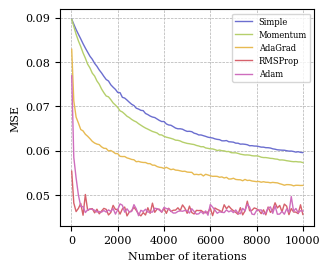

In [3]:
FOLDER = "../figs/"
SAVE_NAME = "sgd_mse_against_its_Ridge"
FILE_NAME = "../output/sgd_mse_vs_its_Ridge.out"

set_plot_params(1,1)
colors = mpl.color_sequences["tab20b"]

gds = [
        "simple_stochastic",
        "momentum_stochastic",
        "adagrad_stochastic",
        "RMSProp_stochastic",
        "adam_stochastic",
]

capitalized_labels = [
    "Simple",
    "Momentum",
    "AdaGrad",
    "RMSProp",
    "Adam",
]

data = np.loadtxt(FILE_NAME, unpack=True)
its = data[0]
# plot gd from saved data
for i, gd in enumerate(gds):
    plt.plot(its, data[i+1], label = capitalized_labels[i], color = colors[4*i+2])

plt.ylabel("MSE")
plt.xlabel("Number of iterations")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(FOLDER + SAVE_NAME + ".pdf")
plt.show()

### LASSO Gradient Descent

In [8]:
"""
Generates and saves the MSE for each number of iterations in range(min_its, max_its, step_size) for
each gradient descent method in the list gds. Outputs to the result to file.
"""

SAVE_NAME = "../output/gd_mse_vs_its_LASSO.out"

np.random.seed(2025)

n=1000
deg = 10

min_its = 10
max_its = 10000
step_size = 100


learning_rate = 0.001

x = np.linspace(-1,1, n)

y_true = Runge_func(x)
y_noisy = y_true + np.random.normal(0,0.1, n)


X_unscaled = Polynomial_Features(x, deg)

X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_noisy, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_mean = y_train.mean()

# only non-stochastic versions
gds = [
        "simple",
        "momentum",
        "adagrad",
        "RMSProp",
        "adam",
]

its = np.array(range(0,max_its+1, step_size))
its[0]=10

output = np.zeros((len(its), len(gds)+1), dtype = float)
output[:,0] = its

for i_gd, gd in enumerate(gds):
    #check if file exists
    # if it does not compute its contents
    errors = np.zeros_like(its, dtype=float)
    # perform 1 run per num_it in its
    for i_its, num_it in enumerate(its):
        model = LASSO(gd, llambda = 0.01)
        # set precision = 0 so that GD never converges and stops at max_iter.
        thetas, its_done, _ = model.fit(X_train_scaled, y_train, momentum = 0.3, learning_rate = learning_rate ,max_iter = num_it, precision=0)
        if its_done != num_it:
            print(f"its {num_it} not matching")
        errors[i_its] = mean_squared_error(y_test, X_test_scaled @ thetas + y_mean)

    output[:,i_gd+1] = errors

header_string = "LASSO gds, col0 its"
for i, gd in enumerate(gds):
    header_string = header_string + f", col{i} {gd} MSE"

np.savetxt(SAVE_NAME, output, header = header_string)

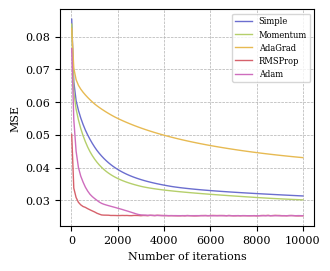

In [12]:
FOLDER = "../figs/"
SAVE_NAME = "gd_mse_against_its_LASSO"
FILE_NAME = "../output/gd_mse_vs_its_LASSO.out"

set_plot_params(1,1)
colors = mpl.color_sequences["tab20b"]

gds = [
        "simple",
        "momentum",
        "adagrad",
        "RMSProp",
        "adam",
]

capitalized_labels = [
    "Simple",
    "Momentum",
    "AdaGrad",
    "RMSProp",
    "Adam",
]

data = np.loadtxt(FILE_NAME, unpack=True)
its = data[0]
# plot gd from saved data
for i, gd in enumerate(gds):
    plt.plot(its, data[i+1], label = capitalized_labels[i], color = colors[4*i+2])

plt.ylabel("MSE")
plt.xlabel("Number of iterations")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(FOLDER + SAVE_NAME + ".pdf")
plt.show()

### LASSO Stochastic Gradient Descent

In [48]:
"""
Generates and saves the MSE for each number of iterations in range(min_its, max_its, step_size) for
each gradient descent method in the list gds. Outputs to the result to file.
"""

SAVE_NAME = "../output/sgd_mse_vs_its_LASSO_mbsize40.out"

np.random.seed(2025)

n=1000
deg = 10

min_its = 10
max_its = 10000
step_size = 100


learning_rate = 0.001

x = np.linspace(-1,1, n)

y_true = Runge_func(x)
y_noisy = y_true + np.random.normal(0,0.1, n)


X_unscaled = Polynomial_Features(x, deg)

X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_noisy, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_mean = y_train.mean()

# only stochastic versions
gds = [
        "simple_stochastic",
        "momentum_stochastic",
        "adagrad_stochastic",
        "RMSProp_stochastic",
        "adam_stochastic",
]

its = np.array(range(0,max_its+1, step_size))
its[0]=10

output = np.zeros((len(its), len(gds)+1), dtype = float)
output[:,0] = its

for i_gd, gd in enumerate(gds):
    #check if file exists
    # if it does not compute its contents
    errors = np.zeros_like(its, dtype=float)
    # perform 1 run per num_it in its
    for i_its, num_it in enumerate(its):
        model = LASSO(gd, llambda = 0.01)
        # set precision = 0 so that GD never converges and stops at max_iter.
        thetas, its_done, _ = model.fit(X_train_scaled, y_train, momentum = 0.3, mini_batch_size=40, learning_rate = learning_rate ,max_iter = num_it, precision=0)
        if its_done != num_it:
            print(f"its {num_it} not matching")
        errors[i_its] = mean_squared_error(y_test, X_test_scaled @ thetas + y_mean)

    output[:,i_gd+1] = errors

header_string = "LASSO gds, col0 its"
for i, gd in enumerate(gds):
    header_string = header_string + f", col{i} {gd} MSE"

np.savetxt(SAVE_NAME, output, header = header_string)

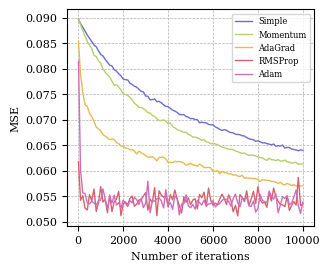

In [49]:
FOLDER = "../figs/"
SAVE_NAME = "sgd_mse_against_its_LASSO_mbsize40"
FILE_NAME = "../output/sgd_mse_vs_its_LASSO_mbsize40.out"

set_plot_params(1,1)
colors = mpl.color_sequences["tab20b"]

gds = [
        "simple_stochastic",
        "momentum_stochastic",
        "adagrad_stochastic",
        "RMSProp_stochastic",
        "adam_stochastic",
]

capitalized_labels = [
    "Simple",
    "Momentum",
    "AdaGrad",
    "RMSProp",
    "Adam",
]

data = np.loadtxt(FILE_NAME, unpack=True)
its = data[0]
# plot gd from saved data
for i, gd in enumerate(gds):
    plt.plot(its, data[i+1], label = capitalized_labels[i], color = colors[4*i+2])

plt.ylabel("MSE")
plt.xlabel("Number of iterations")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(loc = "upper right")
plt.savefig(FOLDER + SAVE_NAME + ".pdf")
plt.show()